# PANDAS

- Panel Data Analysis 혹은 Python Data Analysis의 약자
- Excel, CSV 등의 정형 데이터를 처리할 수 있게 도와주는 파이썬 패키지

In [1]:
# 패키지 설치
# ! pip install <패키지 이름>
! pip install pandas

# Anaconda 설치 시, Pandas가 이미 설치된 상태임으로 따로 실행할 필요 없음.

In [2]:
# 파이썬 패키지 불러오기
import pandas as pd

# import <패키지이름> as <별명>
# <별명> 부분은 꼭 필요한 부분은 아니지만, 판다스 사용시 대부분 저렇게 사용함으로 똑같이 맞춰주면 편함

# 1. 시리즈 생성

Series(시리즈)는 1차원 데이터임으로 리스트를 통해 정의할 수 있다.

In [4]:
a = [1, 7, 2]

my_series = pd.Series(a)

print(my_series)
# 이 경우, 시리즈에서 자동으로 인덱스를 0부터 설정해줌으로 
# 위에서 1,7,2 가 각각 인덱스 번호 0,1,2에 부여되었다.

0    1
1    7
2    2
dtype: int64


In [5]:
# 리스트와 같이, [index number]를 통해 해당 인덱스 번호의 아이템을 추출할 수 있다.
my_series[0]

1

In [6]:
my_series[1]

7

In [7]:
a = [1, 7, 2]

# 자동으로 인덱스를 생성하지 않고, 자신이 직접 정의하고 싶은 경우 인덱스 또한 리스트를 통해 부여한다.
my_series1 = pd.Series(a, index = ["x", "y", "z"])

print(my_series1)

x    1
y    7
z    2
dtype: int64


In [8]:
# 이 경우, 해당 인덱스를 똑같이 입력해주면, 해당 인덱스의 아이템을 불러올수있다.
my_series1['x']

1

In [9]:
my_series1['y']

7

# 2. 데이터프레임
DataFrame(데이터프레임)은 2차원 테이블 데이터로 흔히 엑셀 등에서 볼수있는 테이블이라고 생각하면 된다.

In [25]:
# 앞서 딕셔너리 타입을 정의하는 파이썬 문법을 통해, 딕셔너리 생성
# 딕셔너리 타입은 {key1:value1}를 갖는다
my_dict = {
  'Country': ["Korea", "UK", "France"],
  'Capital': ["Seoul", "London", "Paris"]
}

In [26]:
# key에는 Capital과 Country를 가진다
my_dict.keys()

dict_keys(['Country', 'Capital'])

In [27]:
# Value는 각각 세개의 리스트를 갖는다
my_dict.values()

dict_values([['Korea', 'UK', 'France'], ['Seoul', 'London', 'Paris']])

In [28]:
df = pd.DataFrame(my_dict)

print(df)
# 이 경우에도 자동으로 인덱스가 설정된 것을 볼 수 있다.

  Country Capital
0   Korea   Seoul
1      UK  London
2  France   Paris


In [29]:
df1 = pd.DataFrame(my_dict, index = ["x", "y", "z"])

print(df1)
# 앞선 시리즈와 같이, 인덱스를 자신이 원하는데로 설정할수 있다.

  Country Capital
x   Korea   Seoul
y      UK  London
z  France   Paris


## DataFrame Indexing

In [30]:
# location이라는 뜻의 loc[인덱스번호]
df.loc[0]

Country    Korea
Capital    Seoul
Name: 0, dtype: object

In [31]:
# 자신이 지정한 인덱스는 해당 인덱스를 사용한다
df1.loc['x']

Country    Korea
Capital    Seoul
Name: x, dtype: object

In [32]:
# 생성한 데이터프레임의 콜롬명 
df.columns

Index(['Country', 'Capital'], dtype='object')

In [33]:
# 하나의 콜롬만 가져와서 시리즈로 나타냄
df['Capital']

0     Seoul
1    London
2     Paris
Name: Capital, dtype: object

In [34]:
df.Capital

0     Seoul
1    London
2     Paris
Name: Capital, dtype: object

In [35]:
# 여러 콜롬명을 가져오기, 아래의 경우 위치만 바꿈
df[['Country','Capital']]

,Country,Capital
0,Korea,Seoul
1,UK,London
2,France,Paris


## 특정 아이템 하나만 가져오기
앞서 정의한 데이터 프레임에서 Paris만 추출하기

In [44]:
# Paris가 포함된 콜롬을 불러온다. 
# Paris는 Capital 콜롬에 속해있다
df["Capital"]

0     Seoul
1    London
2     Paris
Name: Capital, dtype: object

In [45]:
# 이 경우, 시리즈로 생각하면 됨으로, 시리즈 인덱싱을 활용
df['Capital'].loc[2]

'Paris'

In [46]:
df

,Country,Capital
0,Korea,Seoul
1,UK,London
2,France,Paris


In [48]:
# iloc 활용 -> (row,column)
# 위의 데이터프레임에서 Paris의 위치는
# row는 2번 인덱스에 존재 -> 2
# column은 Capitaldl 두번째 콜롬이지만 파이썬은 0을 시작점으로 함으로, -> 1
df.iloc[2,1]

'Paris'

# 3. 저장 및 불러오기

In [49]:
# CSV 파일로 저장
df.to_csv("Country.csv")

판다스 공식 홈페이지를 통해 각 함수의 Parameter를 확인할 수 있다. <br>
https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

너무 많아서 다 외울수는 없지만, 원하는 부분을 가져다 쓸수있는 능력은 필요.
- index_col = 0 -> 인덱스콜롬을 0번 콜롬으로 지정
- header = 0 -> 콜롬명 지정
- encoding = 'utf-8'/ 'cp949'/ 'utf-8-sig' -> 인코딩 타입이 달라서 한국어가 깨지는 경우 보통 인코딩 타입을 바꿔주면 실행됨

In [52]:
# CSV 파일 읽기
pd.read_csv("Country.csv", index_col = 0)

,Country,Capital
0,Korea,Seoul
1,UK,London
2,France,Paris


In [53]:
# 엑셀 파일로 저장
df.to_excel("Country.xlsx")

In [55]:
# 엑셀 파일 읽기
pd.read_excel("Country.xlsx", index_col = 0)

,Country,Capital
0,Korea,Seoul
1,UK,London
2,France,Paris


# 4. 실제 데이터 다운받아서 불러오기

활용 데이터: https://www.data.go.kr/data/15091407/fileData.do#tab-layer-file

In [56]:
# 데이터들은 dataset 폴더 등을 만들어서 관리하면 정리하기 좋다.
# 아래와 같이 한국어 자료의 경우, utf-8로 인코딩되어서 에러가 뜨는 모습 
pd.read_csv("dataset/인천광역시 미추홀구_국제결혼 현황.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 0: invalid start byte

In [3]:
pd.read_csv("dataset/인천광역시 미추홀구_국제결혼 현황.csv", encoding='cp949')

,연도,외국인 아내와 혼인건수,외국인 남편과 혼인건수,합계
0,2013,144,44,188
1,2014,131,42,173
2,2015,383,42,425
3,2016,111,38,149
4,2017,135,34,169
5,2018,150,45,195
6,2019,165,50,215
7,2020,114,36,150


In [4]:
# 해당 파일을 df 변수에 저장
df = pd.read_csv("dataset/인천광역시 미추홀구_국제결혼 현황.csv", encoding='cp949')

# 실습 01: 2020년 아내/남편과 혼인건수 파이차트 그리기

## 그래프 시각화 학습 팁:
1. https://www.python-graph-gallery.com/ 에서 이미 그려진 그래프를 코드를 불러온다.
2. 값을 변경해가며 어떤 값이 어떤 시각화 효과가 있는지 이해한다.
3. 원하는 값을 해당 부분에 바꿔준다.

## 1. https://www.python-graph-gallery.com/ 에서 이미 그려진 그래프를 코드를 불러온다.
위의 사이트에서 파이차트 부분에 가장 기본적인 파이 차트를 불러와서 실행시킨다.

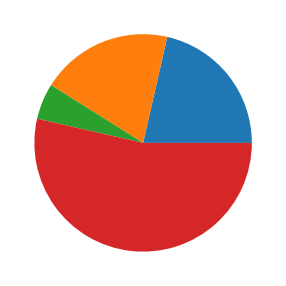

In [6]:
# library
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
# create random data
values=[12,11,3,30]
 
# Create a pieplot
plt.pie(values);
plt.show();

## 2. 값을 변경해가며 어떤 값이 어떤 시각화 효과가 있는지 이해한다.
아래 values값을 바꾸면 파이차트의 값이 바뀌는 것을 볼수있다.

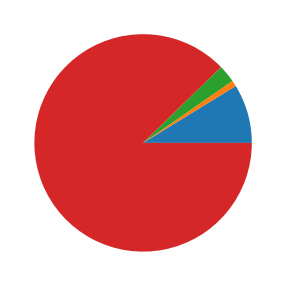

In [62]:
# library
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
# create random data
values=[10,1,3,100]
 
# Create a pieplot
plt.pie(values);
plt.show();

## 3. 원하는 값을 해당 부분에 바꿔준다.

In [63]:
df

,연도,외국인 아내와 혼인건수,외국인 남편과 혼인건수,합계
0,2013,144,44,188
1,2014,131,42,173
2,2015,383,42,425
3,2016,111,38,149
4,2017,135,34,169
5,2018,150,45,195
6,2019,165,50,215
7,2020,114,36,150


In [64]:
# 앞서 불러온 데이터 프레임에서 원하는 값은 2020년도의 아내/남편의 혼인건수임으로
# 이를 인덱싱을 통하여 불러온다.
df.iloc[7,[1,2]]

외국인 아내와 혼인건수    114
외국인 남편과 혼인건수     36
Name: 7, dtype: int64

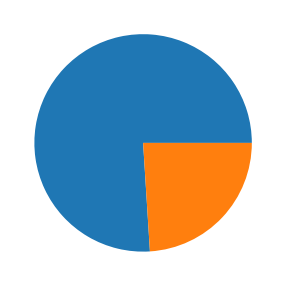

In [67]:
# library
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
# create random data
values = df.iloc[7,[1,2]] #따라서, 해당부분을 values 부분에 바꿔준다.
 
# Create a pieplot
plt.pie(values);
plt.show();

위와 같은 방법으로 여러 그래프를 연습해보고,자주 사용하게 될 몇몇 특성들을 정리해두면 나중에 다시 그리기 쉽다.

In [28]:
# 한글 폰트 사용을 위해서 세팅
import matplotlib.font_manager as fm
# font_path = '/usr/share/fonts/AppleGothic.ttf' 
font_path = "C:/Windows/Fonts/malgun.ttf"
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

In [29]:
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
for i in range(len(font_list[:])):
    if "malgun" in font_list[i]:
        print(font_list[i])

C:\WINDOWS\Fonts\malgunbd.ttf
C:\Windows\Fonts\malgun.ttf
C:\Windows\Fonts\malgunbd.ttf
C:\Windows\Fonts\malgunsl.ttf
C:\WINDOWS\Fonts\malgun.ttf
C:\WINDOWS\Fonts\malgunsl.ttf


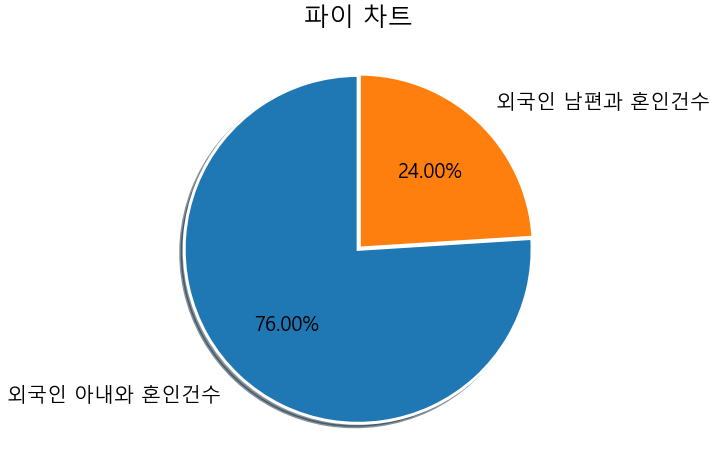

In [30]:
# 그래프 사이즈 조절
plt.figure(figsize=(8,8))

# 데이터 입력
names = df.columns[1:3]
values = df.iloc[7,[1,2]]

# 파이 차트에 대한 설정 
plt.pie(values, 
        labels=names, 
        labeldistance=1.15, 
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
        colors= ['tab:blue','tab:orange'],
        autopct = "%0.2f%%",
        textprops = {"fontsize":20},
        startangle = 90,
        explode = [0,0.01],
        shadow = True
       )

# 타이틀 및 축 설정
plt.title('파이 차트', fontsize=25)

# 그래프 보여주기 
plt.show()

## Problem01: 위의 그래프를 참고하여 2013년 혼인건수 비율 파이차트 그리기

# 라인 그래프 그리기

참조: https://www.python-graph-gallery.com/120-line-chart-with-matplotlib

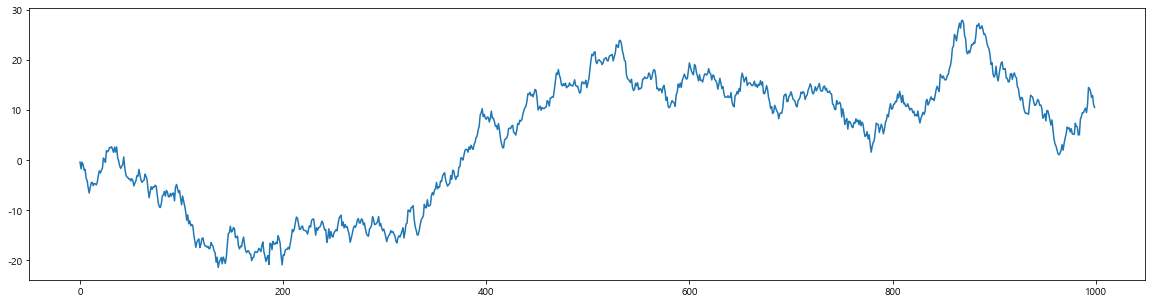

In [31]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
 
# create data
values=np.cumsum(np.random.randn(1000,1))
 
# use the plot function
plt.plot(values)

# show the graph
plt.show()

## Problem02: 위의 그래프를 참고하여 연도별 전체 혼인건수 라인그래프 그리기

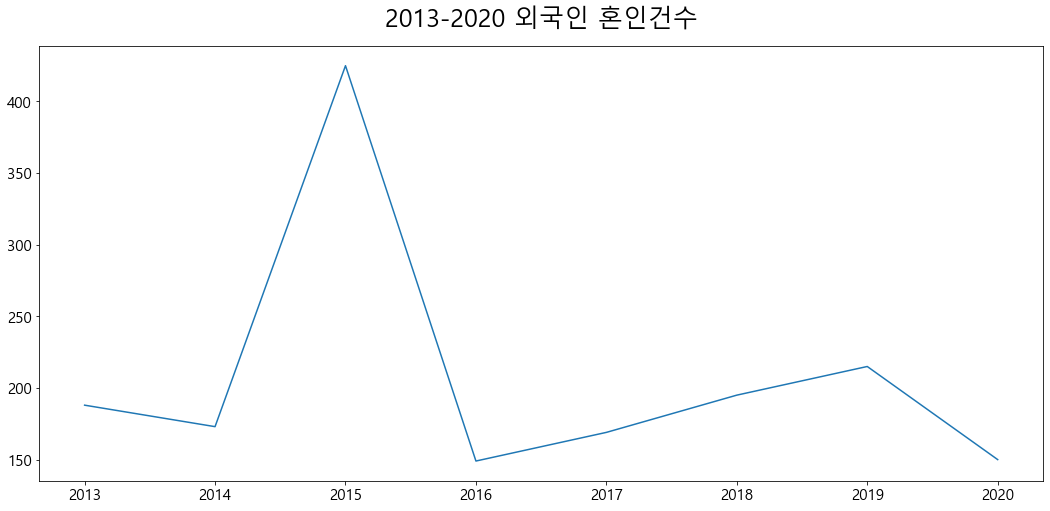

In [42]:
# libraries
import matplotlib.pyplot as plt
import numpy as np

# 그래프 사이즈 조절
plt.figure(figsize=(18,8))

# create data
values = df['합계']
labels = df['연도']

# use the plot function
plt.plot(labels,values)

# 축 설정
plt.title('2013-2020 외국인 혼인건수', fontsize=25, pad=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

# show the graph
plt.show()

# 막대 그래프 그리기

참조: https://www.python-graph-gallery.com/11-grouped-barplot

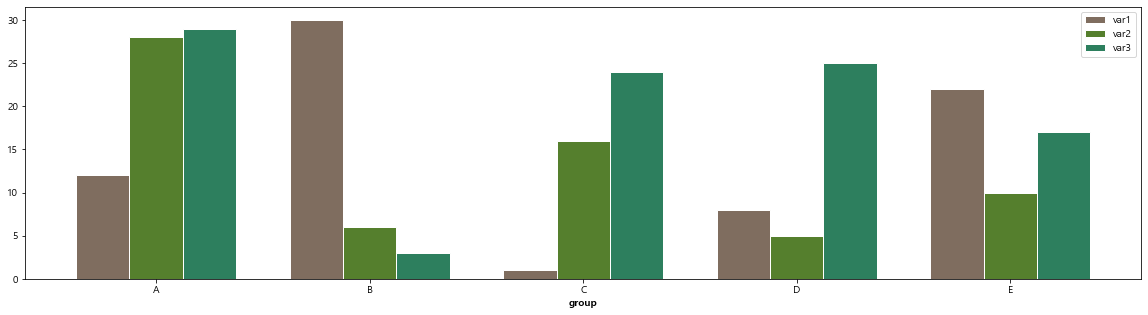

In [60]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

## Problem03: 위의 그래프를 참고하여 연도별 남펴 혼인건수 라인그래프 그리기

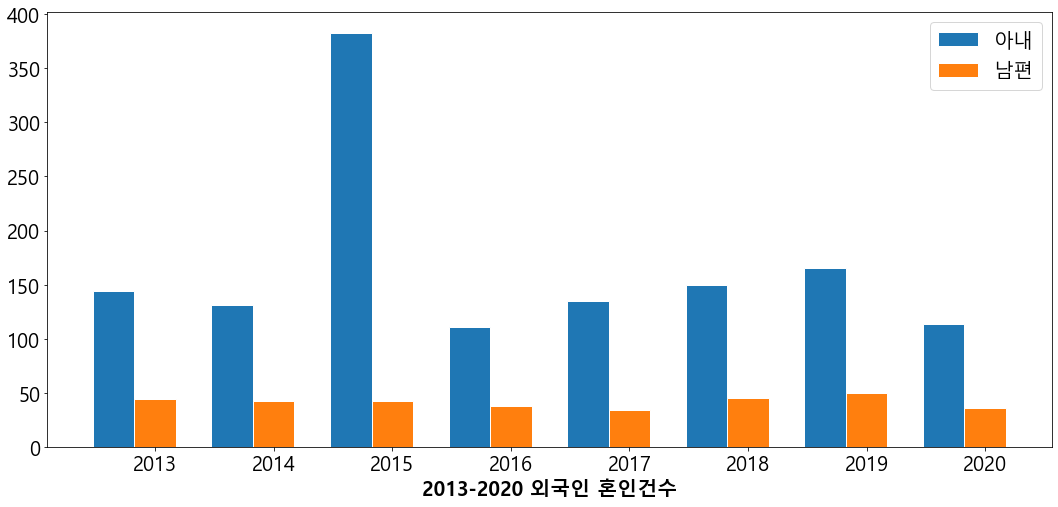

In [59]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

# 그래프 사이즈 조절
plt.figure(figsize=(18,8))

# set width of bars
barWidth = 0.35
 
# set heights of bars
bars1 = df['외국인 아내와 혼인건수']
bars2 = df['외국인 남편과 혼인건수']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='tab:blue', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='tab:orange', width=barWidth, edgecolor='white', label='var2')
 
# Add xticks on the middle of the group bars
plt.xlabel('2013-2020 외국인 혼인건수', fontweight='bold', fontsize=20)
plt.xticks([r + barWidth for r in range(len(bars1))], df['연도'], fontsize=20)
plt.yticks(fontsize=20)

# Create legend & Show graphic
plt.legend(fontsize=20, labels=['아내','남편'])
plt.show()